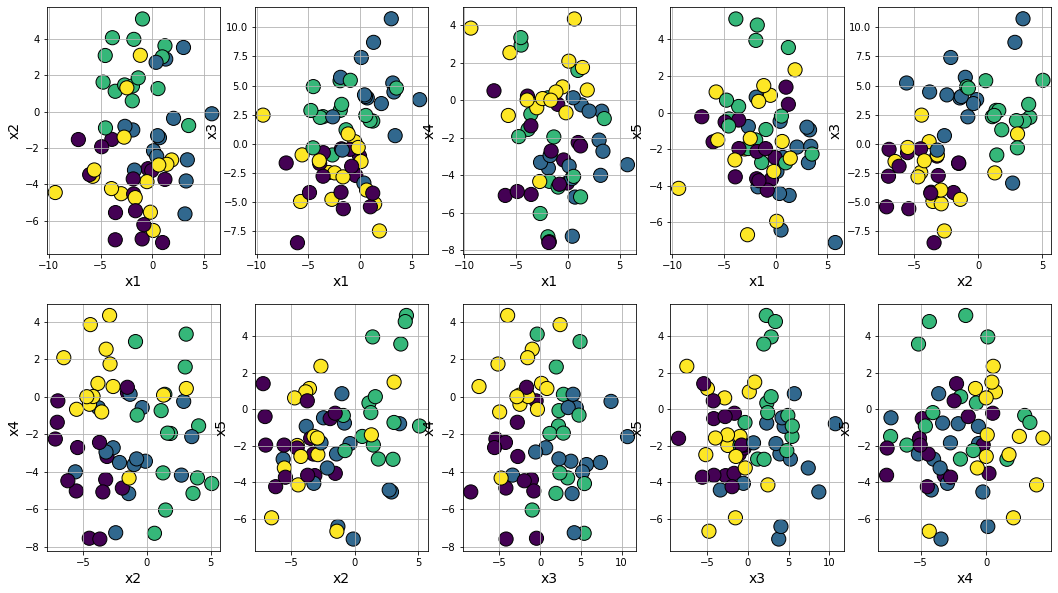

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=60, n_features=5, centers=4, cluster_std=2.5, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,6)])
df['y'] = data[1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from itertools import combinations
from math import ceil
lst_var=list(combinations(df.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df[var1],df[var2],s=200,c=df['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [36]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(train_features)
X_test = sc.transform(test_features)

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
fit = model.fit(X_train, train_labels)

y_pred = model.predict(X_test)

In [39]:
# Probabilities for each class
rf_probs = model.predict_proba(train_features)[:, 1]

In [40]:
def proximityMatrix(model, X, normalize=True):      

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat  

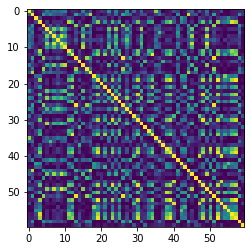

In [41]:
prox_mat = proximityMatrix(model, X, normalize=True)
plt.imshow(prox_mat)

In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, 
                                  memory=None, 
                                  connectivity=None)
predict_labels = cluster.fit_predict(prox_mat)
score = adjusted_rand_score(df['y'] , predict_labels)
score

0.4096746238083983

In [42]:
from numpy import array
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd.fit(prox_mat)
result = svd.transform(prox_mat)
#print(result)

Text(0, 0.5, 'SVD 2')

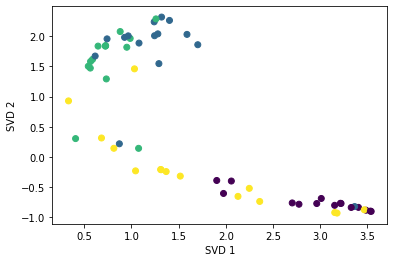

In [43]:
plt.scatter(result[:, 0], result[:, 1], c = df['y'])
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')

In [44]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, 
                                  memory=None, 
                                  connectivity=None)
predict_labels = cluster.fit_predict(result)
score = adjusted_rand_score(df['y'] , predict_labels)
score

0.3409857882979229